In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

In [2]:
data_dir = '../data/'

returns_df = pd.read_csv(data_dir+'returns_all.csv')

In [3]:
returns_df['time'] = pd.to_datetime(returns_df['time'])
returns_df = returns_df.set_index('time')

In [4]:
len(returns_df.columns)

124

In [5]:
returns_df.head()

AU200AUD    AUDCAD    AUDCHF    AUDHKD    AUDJPY    AUDNZD  \
time                                                                     
2011-08-29 -0.013380  0.003423  0.007609  0.002413  0.001245 -0.005630   
2011-09-01 -0.019738  0.000802 -0.016241 -0.006563 -0.008939 -0.004032   
2011-09-05  0.008129 -0.006565  0.084556 -0.005776  0.003531  0.005082   
2011-09-06  0.026472  0.009459  0.011441  0.016753  0.011576  0.005447   
2011-09-07 -0.016923 -0.001814  0.012760 -0.008196 -0.004868 -0.006688   

              AUDSGD    AUDUSD    BCOUSD    CADCHF    ...       XAUHKD  \
time                                                  ...                
2011-08-29  0.003296  0.002446  0.017140  0.004278    ...     0.025948   
2011-09-01 -0.007884 -0.007283 -0.012360 -0.017378    ...     0.031385   
2011-09-05 -0.003758 -0.006351  0.028848  0.091047    ...    -0.013365   
2011-09-06  0.014015  0.016760  0.028554  0.001951    ...    -0.031228   
2011-09-07 -0.001586 -0.008118 -0.020054  0.014685    ...     0.028430   

              XAUJPY    XAUNZD    XAUSGD    XAUUSD    XAUXAG    XCUUSD  \
time                                                                     
2011-08-29  0.024728  0.017808  0.026838  0.025977  0.015017  0.008525   
2011-09-01  0.029023  0.034043  0.030041  0.030664 -0.009010 -0.006547   
2011-09-05 -0.004016 -0.002429 -0.011366 -0.013946  0.009547  0.001726   
2011-09-06 -0.036466 -0.042426 -0.033950 -0.031220 -0.020444  0.017003   
2011-09-07  0.031785  0.029782  0.035023  0.028519  0.010625 -0.003650   

              XPDUSD    XPTUSD    ZARJPY  
time                                      
2011-08-29  0.028760  0.014706 -0.003863  
2011-09-01 -0.008929  0.015272 -0.009149  
2011-09-05 -0.021137 -0.015761  0.005825  
2011-09-06  0.004662 -0.015193 -0.001938  
2011-09-07  0.014512  0.012227 -0.002590  

[5 rows x 124 columns]

In [6]:
avg_returns = returns_df.sum(axis=0)

In [7]:
avg_returns = avg_returns.sort_values(ascending=False)

In [8]:
avg_returns.head()

NAS100USD    0.813275
XAUXAG       0.795655
USDTRY       0.764107
JP225USD     0.590379
SPX500USD    0.572181
dtype: float64

In [9]:
avg_returns.index

Index(['NAS100USD', 'XAUXAG', 'USDTRY', 'JP225USD', 'SPX500USD', 'US30USD',
       'US2000USD', 'EURTRY', 'DE30EUR', 'USDZAR',
       ...
       'XAGCAD', 'XAGNZD', 'XAGJPY', 'XAGEUR', 'XAGGBP', 'XAGSGD', 'SUGARUSD',
       'XAGCHF', 'XAGHKD', 'XAGUSD'],
      dtype='object', length=124)

** Conditional Labeller - To find maximum value and return that as a label value **

In [10]:
def cond_labeller(series, value):
#     return series[series>value].index
    return series[series==series.max()].index

In [11]:
cond_labeller(avg_returns,0.4)

Index(['NAS100USD'], dtype='object')

** Radial Histogram | Radial Barchart **

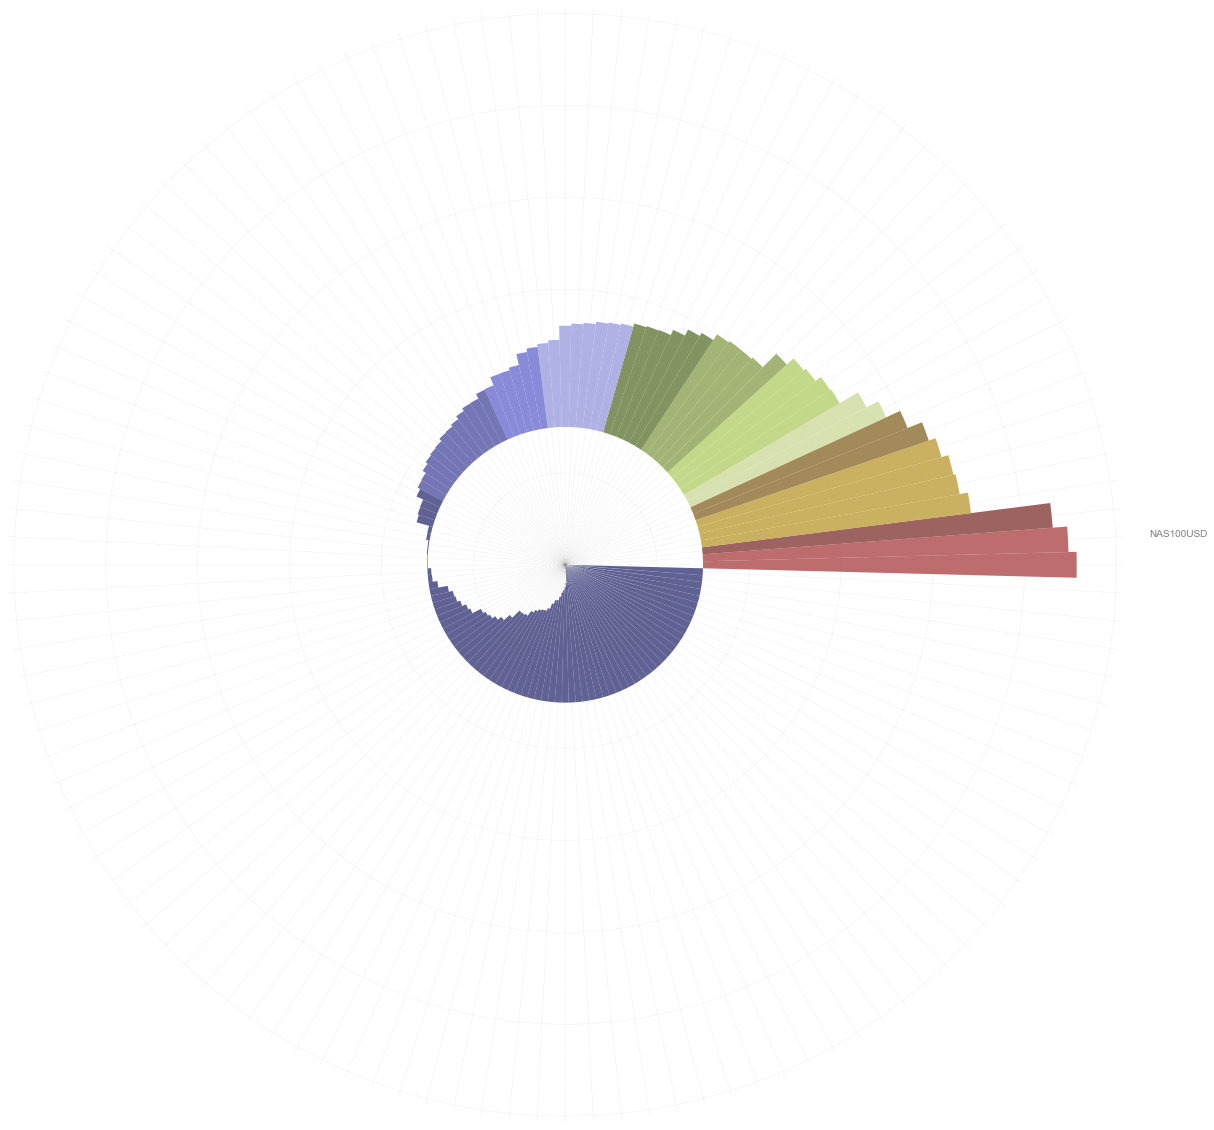

In [12]:
plt.figure(figsize=(12,12))

params = {'legend.fontsize': 10,
          'figure.figsize': (20, 60),
          'axes.facecolor' : 'white',
          'axes.labelsize': 10,
          'axes.titlesize': 12,
          'xtick.color': 'gray',
          'xtick.labelsize': 10,
          'ytick.color': 'gray',
          'ytick.labelsize': 0,
         'text.color':'gray',
         'figure.subplot.wspace':0.4,
         'figure.subplot.hspace':0.9,
         'axes.linewidth': 0.1,
         'axes.grid': False,
         'grid.color': 'gray', 
         'grid.linestyle': ':',
         'grid.linewidth': 0.3,
         'grid.alpha': 0.5}
# See https://matplotlib.org/users/customizing.html
plt.rcParams.update(params)
fig = plt.figure()


N = len(returns_df.columns)
bottom = 3
max_height = avg_returns.max()
# sns.set_style('white')
theta = np.linspace(0.0, 2*np.pi, N, endpoint=False)
width = (2*np.pi)/N

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, avg_returns*10, width=width, bottom=bottom)
ax.set_xticks(theta + width)
ax.set_xticklabels(cond_labeller(avg_returns, 0.5))
for r, bar in zip(avg_returns, bars):
    bar.set_facecolor(plt.cm.tab20b(r/1.2))
    bar.set_alpha(0.8)

plt.show()

In [13]:
returns_df['Year'] = returns_df.index.year

In [14]:
annual_returns = returns_df.groupby('Year').sum(axis=0)

In [15]:
annual_returns.iloc[1,:]

AU200AUD     0.126161
AUDCAD       0.002809
AUDCHF       0.007121
AUDHKD      -0.016976
AUDJPY       0.063507
AUDNZD      -0.023822
AUDSGD      -0.030133
AUDUSD      -0.016613
BCOUSD       0.078357
CADCHF       0.001964
CADHKD      -0.021743
CADJPY       0.061948
CADSGD      -0.034226
CHFHKD      -0.024194
CHFJPY       0.058531
CHFZAR      -0.011416
CN50USD      0.149487
CORNUSD      0.100963
DE10YBEUR    0.027636
DE30EUR      0.200670
EU50EUR      0.075438
EURAUD       0.004825
EURCAD       0.008449
EURCHF       0.010748
EURCZK       0.061942
EURDKK       0.003692
EURGBP      -0.034234
EURHKD      -0.012755
EURHUF      -0.010984
EURJPY       0.070371
               ...   
USDTHB      -0.025456
USDTRY      -0.008574
USDZAR       0.012288
WHEATUSD     0.322609
WTICOUSD     0.032019
XAGAUD       0.031274
XAGCAD       0.031291
XAGCHF       0.034632
XAGEUR       0.027164
XAGGBP      -0.010594
XAGHKD       0.013139
XAGJPY       0.106778
XAGNZD       0.004095
XAGSGD      -0.000630
XAGUSD    

In [16]:
len(annual_returns)

7

In [17]:
annual_returns

AU200AUD    AUDCAD    AUDCHF    AUDHKD    AUDJPY    AUDNZD    AUDSGD  \
Year                                                                         
2011 -0.198757  0.008071  0.075860 -0.095872 -0.094106  0.021766  0.006669   
2012  0.126161  0.002809  0.007121 -0.016976  0.063507 -0.023822 -0.030133   
2013  0.097787 -0.129219 -0.229353 -0.184959 -0.088381 -0.122962 -0.160061   
2014  0.047522 -0.055126 -0.047498 -0.155150 -0.009112 -0.060283 -0.102691   
2015 -0.066384  0.092105 -0.162536 -0.083636 -0.094518  0.032831 -0.032228   
2016  0.057489 -0.083887 -0.071008 -0.068173 -0.086356 -0.063749 -0.051021   
2017  0.029550  0.044730  0.051910  0.118317  0.048177  0.057113  0.045785   

        AUDUSD    BCOUSD    CADCHF    ...       XAUHKD    XAUJPY    XAUNZD  \
Year                                  ...                                    
2011 -0.095023 -0.113000  0.067735    ...    -0.198081 -0.194480 -0.081420   
2012 -0.016613  0.078357  0.001964    ...     0.072705  0.164432  0.063898   
2013 -0.184929 -0.027676 -0.093565    ...    -0.333829 -0.246756 -0.273979   
2014 -0.157476 -0.535195  0.009678    ...    -0.021640  0.123832  0.072988   
2015 -0.082016 -0.352761 -0.256177    ...    -0.065872 -0.074319  0.046479   
2016 -0.068703  0.303455  0.011844    ...    -0.016860 -0.034146 -0.014459   
2017  0.110165 -0.076846  0.007289    ...     0.155720  0.086098  0.093548   

        XAUSGD    XAUUSD    XAUXAG    XCUUSD    XPDUSD    XPTUSD    ZARJPY  
Year                                                                        
2011 -0.096024 -0.197250  0.321848 -0.340482 -0.186124 -0.280050 -0.196238  
2012  0.059204  0.073014  0.059772  0.041449  0.008718  0.055565  0.071619  
2013 -0.309121 -0.333728  0.101104 -0.113962 -0.037516 -0.179602 -0.040226  
2014  0.032038 -0.023930  0.223650 -0.155403  0.137566 -0.039729  0.067389  
2015 -0.016147 -0.063995  0.059429 -0.283114 -0.481156 -0.298209 -0.231357  
2016  0.001104 -0.017211  0.003555  0.104148  0.024080 -0.015038  0.086350  
2017  0.084222  0.147727  0.026297  0.219041  0.346727  0.126848  0.003199  

[7 rows x 124 columns]

In [18]:
annual_returns.iloc[1,:].name

2012

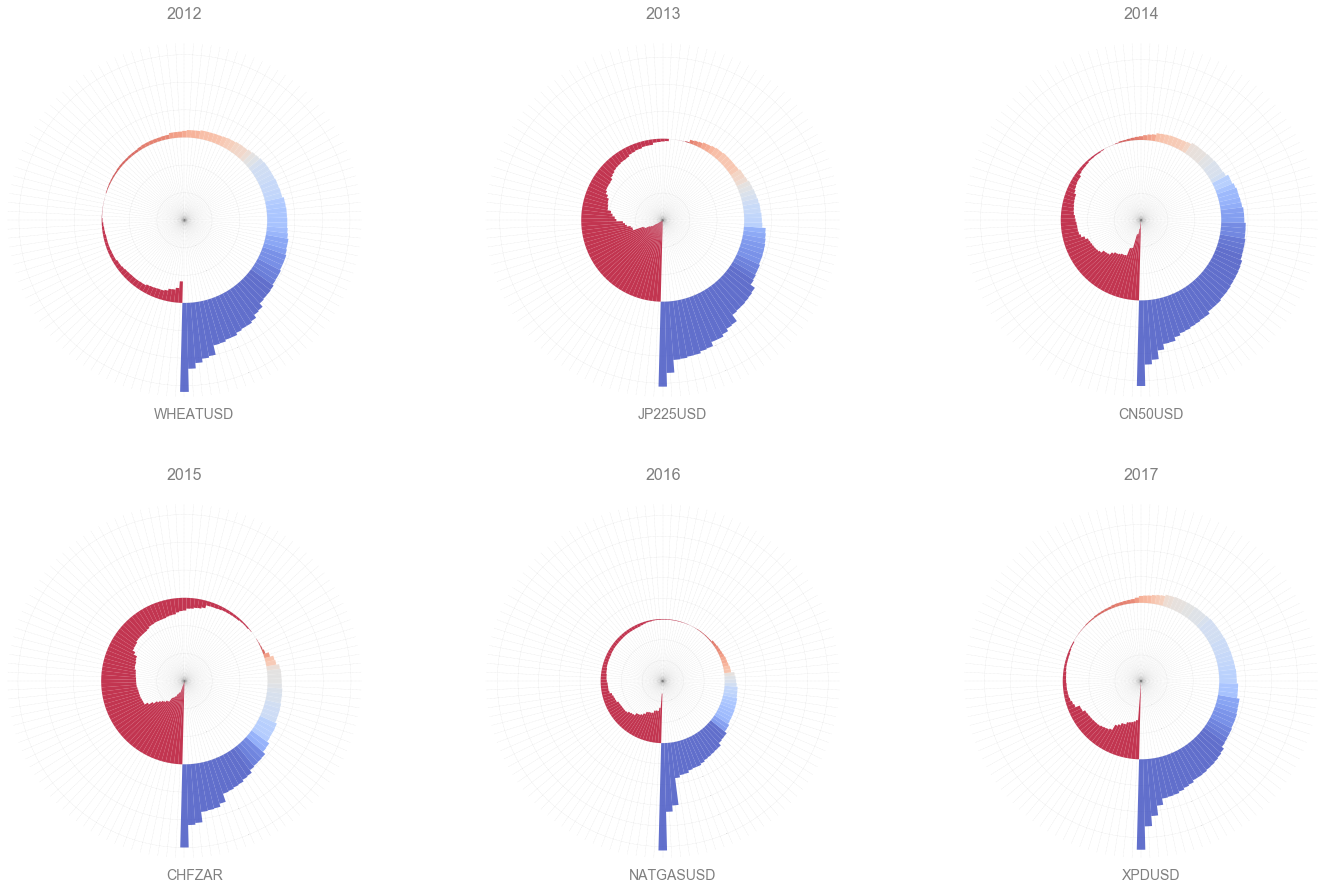

In [19]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(16,12))
params = {'legend.fontsize': 10,
          'figure.figsize': (24, 15),
          'axes.facecolor' : 'white',
          'axes.labelsize': 10,
          'axes.titlesize': 16,
          'axes.labelcolor': 'blue',
          'xtick.color': 'gray',
          'xtick.labelsize': 14,
#           'xtick.major.pad': 10,
#           'xtick.minor.pad': 20,
          'ytick.color': 'gray',
          'ytick.labelsize': 0,
         'text.color':'gray',
         'figure.subplot.wspace':0.1,
         'figure.subplot.hspace':0.2,
         'axes.linewidth': 0.1,
         'axes.grid': False,
         'grid.color': 'gray', 
         'grid.linestyle': ':',
         'grid.linewidth': 0.3,
         'grid.alpha': 0.5}
# See https://matplotlib.org/users/customizing.html
plt.rcParams.update(params)
fig = plt.figure()
# plot_index = 320
gs = gridspec.GridSpec(2, 3)
gs.update(wspace=0.25, hspace=0.3)

for i in range(1, len(annual_returns)):
    N = len(annual_returns.columns)
    bottom = 3
    max_height = annual_returns.iloc[i,:].max()
    theta = np.linspace(0.0, 2*np.pi, N, endpoint=False)
    width = (2*np.pi)/N
    returns = annual_returns.iloc[i,:].sort_values(ascending=False)
    
    ax = plt.subplot(gs[i-1], polar=True)
    ax.set_theta_zero_location("S")
    bars = ax.bar(theta, returns*10, width=width, bottom=bottom)
    ax.set_title(returns.name)
    ax.set_xticks(theta + width)
    ax.set_xticklabels(cond_labeller(returns, 0.25))
    for r, bar in zip(returns, bars):
        bar.set_facecolor(plt.cm.coolwarm_r(r/0.1))
        bar.set_alpha(0.8)

#         plt.tight_layout()
plt.show()

### Creating a Custom CMAP ###

In [20]:
color6 = matplotlib.colors.hex2color('#2b64a9')
color5 = matplotlib.colors.hex2color('#156fa4')
color4 = matplotlib.colors.hex2color('#82c3ed')
color3 = matplotlib.colors.hex2color('#f19cb9')
color2 = matplotlib.colors.hex2color('#d36a93')
color1 = matplotlib.colors.hex2color('#7d2b42')

In [21]:
from matplotlib.colors import LinearSegmentedColormap

In [22]:
colors = [color1, color2, color3, color4, color5, color6]
n_bins = [3, 6, 10, 100]
cm = LinearSegmentedColormap.from_list('Bluish', colors, N=300)

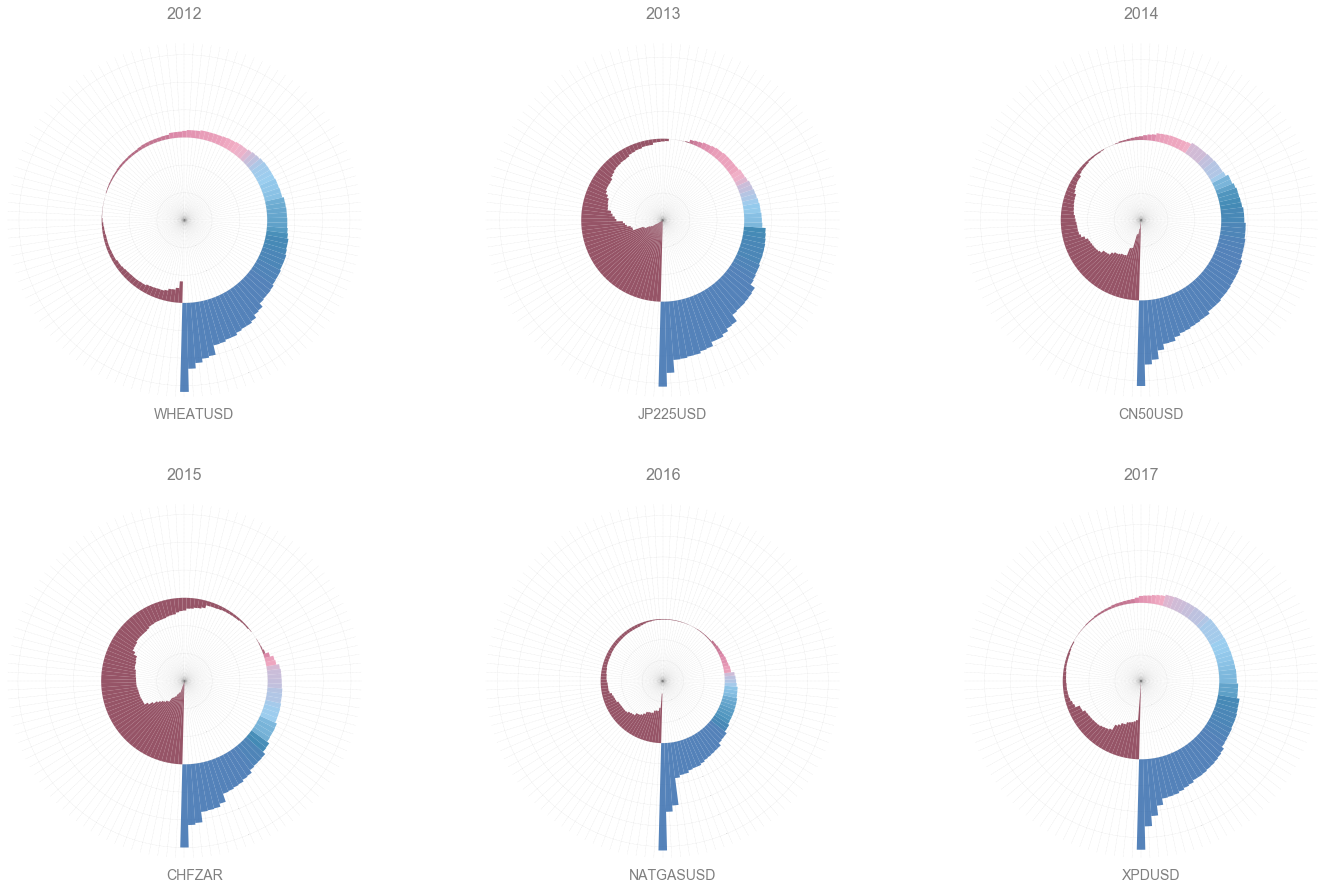

In [23]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(16,12))
params = {'legend.fontsize': 10,
          'figure.figsize': (24, 15),
          'axes.facecolor' : 'white',
          'axes.labelsize': 10,
          'axes.titlesize': 16,
          'axes.labelcolor': 'blue',
          'xtick.color': 'gray',
          'xtick.labelsize': 14,
#           'xtick.major.pad': 10,
#           'xtick.minor.pad': 20,
          'ytick.color': 'gray',
          'ytick.labelsize': 0,
         'text.color':'gray',
         'figure.subplot.wspace':0.1,
         'figure.subplot.hspace':0.2,
         'axes.linewidth': 0.1,
         'axes.grid': False,
         'grid.color': 'gray', 
         'grid.linestyle': ':',
         'grid.linewidth': 0.3,
         'grid.alpha': 0.5}
# See https://matplotlib.org/users/customizing.html
plt.rcParams.update(params)
fig = plt.figure()
# plot_index = 320
gs = gridspec.GridSpec(2, 3)
gs.update(wspace=0.25, hspace=0.3)

for i in range(1, len(annual_returns)):
    N = len(annual_returns.columns)
    bottom = 3
    max_height = annual_returns.iloc[i,:].max()
    theta = np.linspace(0.0, 2*np.pi, N, endpoint=False)
    width = (2*np.pi)/N
    returns = annual_returns.iloc[i,:].sort_values(ascending=False)
    
    ax = plt.subplot(gs[i-1], polar=True)
    ax.set_theta_zero_location("S")
    bars = ax.bar(theta, returns*10, width=width, bottom=bottom)
    ax.set_title(returns.name)
    ax.set_xticks(theta + width)
    ax.set_xticklabels(cond_labeller(returns, 0.25))
    for r, bar in zip(returns, bars):
        bar.set_facecolor(cm(r/0.1))
        bar.set_alpha(0.8)

#         plt.tight_layout()
plt.show()